# Stock Price Anomaly Detection

Techniques and tools used - yfiance, plotly, Z-score, Isolation Forest, DBSCAN, LSTM, AutoEncoder

ref: https://github.com/shubh123a3/Stock-Market-Anomaly-Detection/blob/master/Anomalies%20Detection.ipynb

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from curl_cffi import requests

In [483]:
# price_history class ref link: https://ranaroussi.github.io/yfinance/reference/yfinance.price_history.html
# ticker.info
# ticker.calendar
# ticker.analyst_price_targets
# ticker.quarterly_income_stmt
# ticker.history(period='1mo')

In [484]:
# Get historical market data
session = requests.Session(impersonate="chrome") # resolve yfinance rate limit issue
ticker = 'GME'
ticker_obj = yf.Ticker(ticker, session=session)
start_date = "2020-01-01"
end_date = "2023-12-31"
ticker_data = ticker_obj.history(start=start_date, end=end_date)

In [485]:
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,17814400,0.0,0.0
2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,14175600,0.0,0.0
2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,13579200,0.0,0.0
2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,20912000,0.0,0.0
2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,22517600,0.0,0.0


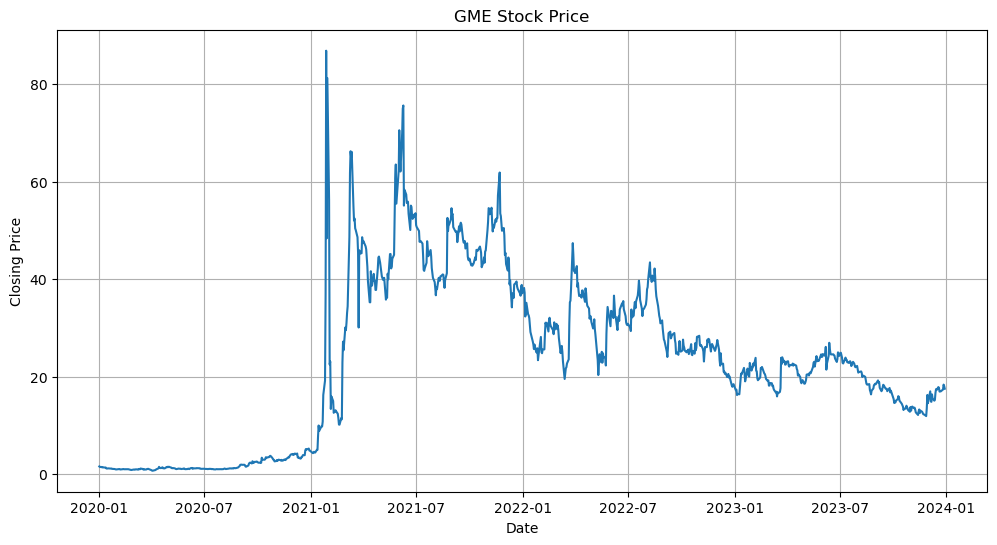

In [486]:
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index, ticker_data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [487]:
ticker_data['Return'] = ticker_data['Close'].pct_change()
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,
2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,17814400,0.0,0.0,NaN
2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,14175600,0.0,0.0,-0.068146
2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,13579200,0.0,0.0,-0.005102
2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,20912000,0.0,0.0,-0.056410
2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,22517600,0.0,0.0,0.036232


In [488]:
ticker_data['Volatility'] = ticker_data['Return'].rolling(window=20).std()
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility
Date,,,,,,,,,
2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,17814400,0.0,0.0,NaN,NaN
2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,14175600,0.0,0.0,-0.068146,NaN
2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,13579200,0.0,0.0,-0.005102,NaN
2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,20912000,0.0,0.0,-0.056410,NaN
2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,22517600,0.0,0.0,0.036232,NaN


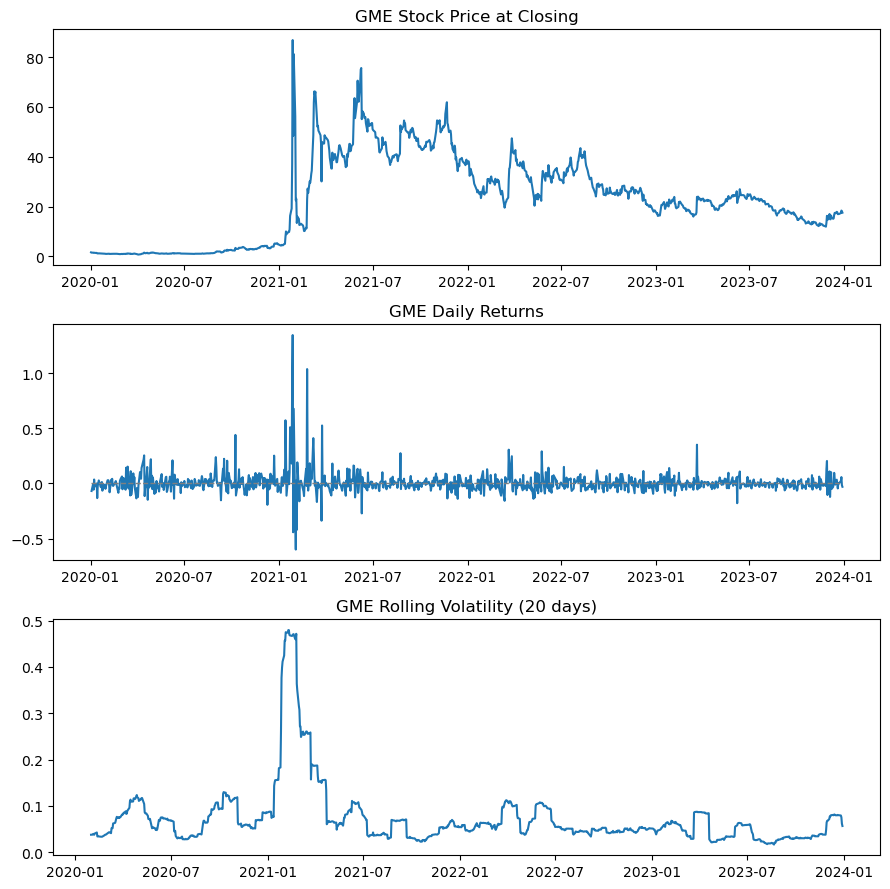

In [489]:
# Plot Closing Price, Daily Returns, and Rolling Volatility
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
axes[0].plot(ticker_data.index, ticker_data['Close'])
axes[0].set_title(f'{ticker} Stock Price at Closing')
axes[1].plot(ticker_data.index, ticker_data['Return'])
baseline = np.linspace(0, 0, len(ticker_data))
axes[1].plot(ticker_data.index, baseline, linestyle='--', color='gray', linewidth=1)
axes[1].set_title(f'{ticker} Daily Returns')
axes[2].plot(ticker_data.index, ticker_data['Volatility'])
axes[2].set_title(f'{ticker} Rolling Volatility (20 days)')
plt.tight_layout()
plt.show()

In [490]:
# Simple Moving Averages (SMA)
ticker_data['SMA_10'] = ticker_data['Close'].rolling(window=10).mean()
ticker_data['SMA_20'] = ticker_data['Close'].rolling(window=20).mean()
ticker_data['SMA_50'] = ticker_data['Close'].rolling(window=50).mean()
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility,SMA_10,SMA_20,SMA_50
Date,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,17814400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,14175600,0.0,0.0,-0.068146,NaN,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,13579200,0.0,0.0,-0.005102,NaN,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,20912000,0.0,0.0,-0.056410,NaN,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,22517600,0.0,0.0,0.036232,NaN,NaN,NaN,NaN


In [491]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
ticker_data['RSI_14'] = calculate_rsi(ticker_data, window=14)

In [492]:
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility,SMA_10,SMA_20,SMA_50,RSI_14
Date,,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,17814400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,14175600,0.0,0.0,-0.068146,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,13579200,0.0,0.0,-0.005102,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,20912000,0.0,0.0,-0.056410,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,22517600,0.0,0.0,0.036232,NaN,NaN,NaN,NaN,NaN


In [493]:
# Bollinger Bands
ticker_data['Upper_BB'] = ticker_data['SMA_20'] + (2 * ticker_data['Close'].rolling(window=20).std())
ticker_data['Lower_BB'] = ticker_data['SMA_20'] - (2 * ticker_data['Close'].rolling(window=20).std())

In [494]:
# Plot tecnical analysis
import plotly.graph_objects as go

fig = go.Figure()

# Add Close price trace
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=2)))
# Add SMA traces
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['SMA_10'], mode='lines', name='SMA 10', line=dict(color='green', width=2, dash='dot')))
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['SMA_50'], mode='lines', name='SMA 50', line=dict(color='red', width=2, dash='dot')))
# Add Bollinger Bands traces
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['Upper_BB'], mode='lines', name='Upper BB', line=dict(color='purple', width=1, dash='dash')))
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['Lower_BB'], mode='lines', name='Lower BB', line=dict(color='purple', width=1, dash='dash')))
# Add RSI trace
# fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['RSI_14'], mode='lines', name='RSI 14', line=dict(color='brown', width=2)))

fig.update_layout(title=f'{ticker}Stock Price with Technical Indicators', xaxis_title='Date', yaxis_title='Stock Price', 
                  legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(255,255,255,0)'), autosize=False, width=1200, height=600,
   
)

# Anomaly Detection Techniques

## Statistical method

### Z-score method

In [495]:
# Statistical method
# Z-score method
from scipy import stats
ticker_data['Close_Z_Score'] = stats.zscore(ticker_data['Close'])
zscore_threshold = 3
anomalies_zscore = ticker_data[np.abs(ticker_data['Close_Z_Score']) > zscore_threshold]

In [496]:
anomalies_zscore

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility,SMA_10,SMA_20,SMA_50,RSI_14,Upper_BB,Lower_BB,Close_Z_Score
Date,,,,,,,,,,,,,,,,
2021-01-27 00:00:00-05:00,88.707497,95.000000,62.250000,86.877502,373586800,0.0,0.0,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,3.765734
2021-01-29 00:00:00-05:00,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.432680
2021-06-08 00:00:00-04:00,73.000000,86.165001,70.250000,75.000000,69756400,0.0,0.0,0.071390,0.086401,63.64825,52.743125,46.10415,71.693999,77.468195,28.018055,3.062784
2021-06-09 00:00:00-04:00,75.779999,82.000000,72.877502,75.639999,53717200,0.0,0.0,0.008533,0.086649,65.97650,54.688625,46.71045,75.160866,80.218630,29.158620,3.100662


In [497]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=anomalies_zscore.index, y=anomalies_zscore['Close'], mode='markers', name='Anomalies (Z-Score)', 
                         marker=dict(color='red', size=8, symbol='x'), showlegend=True))
fig.update_layout(title=f'{ticker} Stock Price with Anomalies Detected (Z-Score Method)', xaxis_title='Date', yaxis_title='Stock Price', 
                  legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(255,255,255,0)'), autosize=False, width=1200, height=600,
                  )
fig.show()

## ML methods

### Isolation Forest

In [498]:
# ML methods
# Isolation Forest
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [499]:
ticker_data[['Close','Volume','Return','Volatility']].isna().sum()

Close          0
Volume         0
Return         1
Volatility    20
dtype: int64

In [500]:
ticker_data = ticker_data.dropna(subset=['Close','Volume','Return','Volatility'])

In [501]:
# Turn on copy on write mode for pandas 3.0+
# pd.options.mode.copy_on_write = True
pd.options.mode.copy_on_write = "warn"

In [502]:
scaler = StandardScaler()
X = scaler.fit_transform(ticker_data[['Close', 'Volume', 'Return', 'Volatility']])
iso_forest = IsolationForest(contamination=0.01, random_state=42)
ticker_data.loc[:,'Anomaly_IsoForest'] = iso_forest.fit_predict(X)

In [503]:
anomalies_iso = ticker_data[ticker_data['Anomaly_IsoForest'] == -1]
anomalies_iso

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility,SMA_10,SMA_20,SMA_50,RSI_14,Upper_BB,Lower_BB,Close_Z_Score,Anomaly_IsoForest
Date,,,,,,,,,,,,,,,,,
2021-01-13 00:00:00-05:00,5.105000,9.662500,5.007500,7.850000,578006800,0.0,0.0,0.573935,0.143319,4.95350,4.654750,3.86645,77.638890,6.516281,2.793219,-0.911376,-1
2021-01-22 00:00:00-05:00,10.647500,19.190001,10.580000,16.252501,788631600,0.0,0.0,0.510807,0.181463,8.77275,6.764500,4.83595,88.481412,13.147844,0.381156,-0.414088,-1
2021-01-26 00:00:00-05:00,22.139999,37.500000,20.049999,36.994999,714352000,0.0,0.0,0.927074,0.261270,13.45125,9.065125,5.84555,96.233627,24.628512,-6.498262,0.813522,-1
2021-01-27 00:00:00-05:00,88.707497,95.000000,62.250000,86.877502,373586800,0.0,0.0,1.348358,0.376478,21.64025,13.146625,7.52745,98.434327,51.142634,-24.849384,3.765734,-1
2021-01-28 00:00:00-05:00,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,-0.442894,0.398567,25.69525,15.324375,8.44040,67.786065,56.200545,-25.551794,1.488508,-1
2021-01-29 00:00:00-05:00,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.678719,0.411380,32.82250,19.146125,10.00510,74.607241,69.157106,-30.864856,3.432680,-1
2021-02-02 00:00:00-05:00,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,-0.600000,0.456885,38.82600,22.632500,11.46410,54.086121,74.129313,-28.864312,-0.044340,-1
2021-02-04 00:00:00-05:00,22.797501,22.875000,13.332500,13.375000,249709200,0.0,0.0,-0.421058,0.474927,40.42000,24.009750,12.06780,50.773451,74.239869,-26.220369,-0.584388,-1
2021-02-24 00:00:00-05:00,11.175000,22.927500,11.175000,22.927500,332446800,0.0,0.0,1.039359,0.471430,12.85275,25.190125,14.50160,49.730602,72.420321,-22.040071,-0.019039,-1


In [504]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=anomalies_iso.index, y=anomalies_iso['Close'], mode='markers', name='Anomalies (Isolation Forest)', 
                         marker=dict(color='red', size=8, symbol='circle'), showlegend=True))
fig.update_layout(title=f'{ticker} Stock Price with Anomalies Detected (Isolation Forest)', xaxis_title='Date', yaxis_title='Stock Price', 
                  autosize=False, width=1200, height=600)
fig.show()

### DBSCAN

In [505]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
ticker_data.loc[:,'Anomaly_DBSCAN'] = dbscan.fit_predict(X)

In [506]:
ticker_data.loc[:, 'Color'] = ticker_data['Anomaly_DBSCAN'].apply(lambda x: 'red' if x == -1 else 'blue')

In [507]:
ticker_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Volatility,SMA_10,SMA_20,SMA_50,RSI_14,Upper_BB,Lower_BB,Close_Z_Score,Anomaly_IsoForest,Anomaly_DBSCAN,Color
Date,,,,,,,,,,,,,,,,,,,
2020-01-31 00:00:00-05:00,0.9775,0.9850,0.9575,0.9600,11566800,0.0,0.0,-0.022901,0.037805,1.08075,1.206875,NaN,10.050244,1.534634,0.879116,-1.319149,1,0,blue
2020-02-03 00:00:00-05:00,0.9700,0.9950,0.9625,0.9875,8102400,0.0,0.0,0.028646,0.038026,1.06075,1.182750,NaN,14.761904,1.499817,0.865683,-1.317521,1,0,blue
2020-02-04 00:00:00-05:00,1.0075,1.0625,0.9925,1.0175,14252400,0.0,0.0,0.030380,0.039506,1.04775,1.160500,NaN,28.666671,1.456676,0.864324,-1.315746,1,0,blue
2020-02-05 00:00:00-05:00,1.0375,1.1025,1.0350,1.0450,10566800,0.0,0.0,0.027027,0.039553,1.03825,1.143750,NaN,35.761577,1.425182,0.862318,-1.314118,1,0,blue
2020-02-06 00:00:00-05:00,1.0500,1.0750,1.0350,1.0350,6041200,0.0,0.0,-0.009569,0.037840,1.02625,1.124000,NaN,34.415583,1.374601,0.873399,-1.314710,1,0,blue


In [508]:
import plotly.express as px
fig = px.scatter(ticker_data, x='Close', y='Volume', color='Color', title=f'DBSCAN Clustering Results on {ticker}', 
                 labels={'Color': 'Cluster'}, hover_data=['Return', 'Volatility'])
fig.update_layout(xaxis_title='Closing Price', yaxis_title='Volume', legend_title='Cluster', autosize=False, width=1200, height=600)
fig.show()

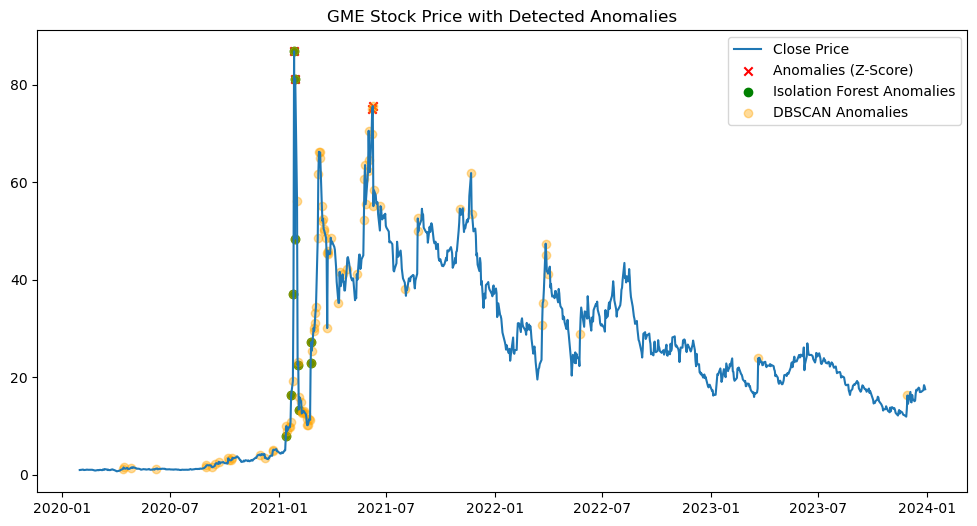

In [509]:
# Plot anomalies detected by DBSCAN, Isolation Forest, and Z-score method
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='Close Price')
plt.scatter(anomalies_zscore.index, anomalies_zscore['Close'], color='red', label='Anomalies (Z-Score)', marker='x')
plt.scatter(ticker_data[ticker_data['Anomaly_IsoForest'] == -1].index, ticker_data[ticker_data['Anomaly_IsoForest'] == -1]['Close'], color='green', label='Isolation Forest Anomalies')
plt.scatter(ticker_data[ticker_data['Anomaly_DBSCAN'] == -1].index, ticker_data[ticker_data['Anomaly_DBSCAN'] == -1]['Close'], color='orange', label='DBSCAN Anomalies', alpha=0.4)
plt.title(f'{ticker} Stock Price with Detected Anomalies')
plt.legend()
plt.show()

In [510]:
import plotly.graph_objects as go
fig = go.Figure()

# Add the line for the closing price
fig.add_trace(go.Scatter(
    x=ticker_data.index,
    y=ticker_data['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='blue'),
))

# Add the scatter plot for Z-Score anomalies
fig.add_trace(go.Scatter(
    x=anomalies_zscore.index,
    y=anomalies_zscore['Close'],
    mode='markers',
    name='Z-Score Anomalies',
    marker=dict(color='red', size=10),
))

# Add the scatter plot for Isolation Forest anomalies
fig.add_trace(go.Scatter(
    x=ticker_data[ticker_data['Anomaly_IsoForest'] == -1].index,
    y=ticker_data[ticker_data['Anomaly_IsoForest'] == -1]['Close'],
    mode='markers',
    name='Isolation Forest Anomalies',
    marker=dict(color='green', size=10),
))

# Add the scatter plot for DBSCAN anomalies
fig.add_trace(go.Scatter(
    x=ticker_data[ticker_data['Anomaly_DBSCAN'] == -1].index,
    y=ticker_data[ticker_data['Anomaly_DBSCAN'] == -1]['Close'],
    mode='markers',
    name='DBSCAN Anomalies',
    marker=dict(color='orange', size=10),
    opacity=0.6
))

# Update layout
fig.update_layout(
    title=f'{ticker} Stock Price with Detected Anomalies',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    width=1200,
    height=600,
)

# Show the plot
fig.show()

In [511]:
print("Number of Z-Score Anomalies:", len(anomalies_zscore))
print("Number of Isolation Forest Anomalies:", sum(ticker_data['Anomaly_IsoForest'] == -1))
print("Number of DBSCAN Anomalies:", sum(ticker_data['Anomaly_DBSCAN'] == -1))

Number of Z-Score Anomalies: 4
Number of Isolation Forest Anomalies: 10
Number of DBSCAN Anomalies: 101


## Advance deep learning model

### LSTM

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense,Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [513]:
# LSTM data preparation
sequence_length = 20
features = ['Close', 'Volume', 'Return', 'Volatility']
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Input sequence (window)
        seq_in = data[i:(i + sequence_length)]
        # Output (next value)
        seq_out = data[i + sequence_length]
        X.append(seq_in)
        y.append(seq_out)
    return np.array(X), np.array(y)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(ticker_data[features])

In [514]:
X, y = create_sequences(normalized_data, sequence_length)

In [515]:
# split data
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [516]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, len(features))),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(len(features))
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5088 - val_loss: 0.1685
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2463 - val_loss: 0.1611
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9906 - val_loss: 0.1426
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9057 - val_loss: 0.1282
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8464 - val_loss: 0.1390
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.9563 - val_loss: 0.1277
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9081 - val_loss: 0.1246
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9107 - val_loss: 0.1223
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8910 - val_loss: 0.1208
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8714 - val_loss: 0.1186
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8571 - val_loss: 0.1172
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8489 - val_

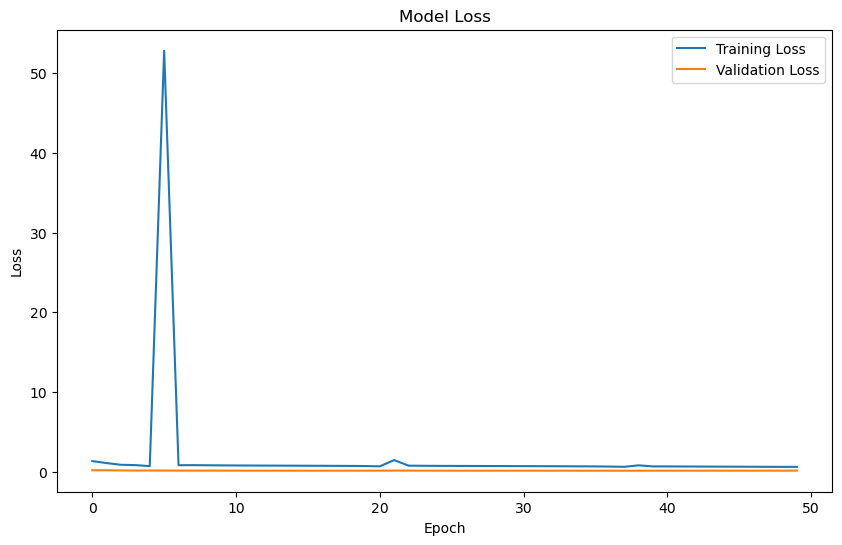

In [517]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [518]:
y_pred=model.predict(X_test)
mse=np.mean(np.power(y_test-y_pred,2),axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


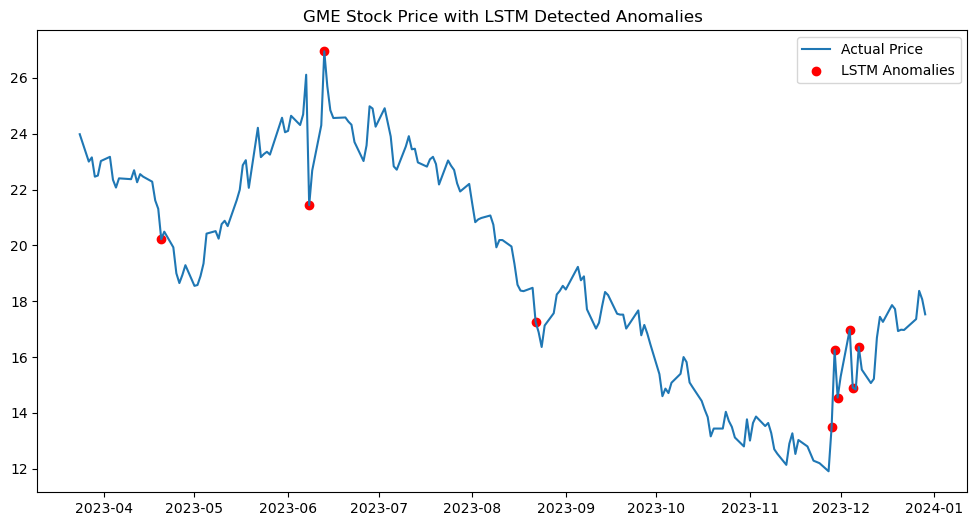

Number of LSTM Detected Anomalies: 10


In [519]:
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index[train_size+sequence_length:], ticker_data['Close'][train_size+sequence_length:], label='Actual Price')
plt.scatter(ticker_data.index[train_size+sequence_length:][anomalies], 
            ticker_data['Close'][train_size+sequence_length:][anomalies], 
            color='red', label='LSTM Anomalies')
plt.title(f'{ticker} Stock Price with LSTM Detected Anomalies')
plt.legend()
plt.show()

# Print summary of LSTM anomalies
print(f"Number of LSTM Detected Anomalies: {sum(anomalies)}")

### autoEncoder

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.optimizers import Adam

In [521]:
# Prepare the data
features = ['Close', 'Volume', 'Return', 'Volatility']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ticker_data[features])

In [522]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [523]:
input_dim = scaled_data.shape[1]
encoding_dim = 2

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(8, activation="relu")(input_layer)
encoder = tf.keras.layers.Dense(4, activation="relu")(encoder)
encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(encoder)
decoder = tf.keras.layers.Dense(4, activation="relu")(encoder)
decoder = tf.keras.layers.Dense(8, activation="relu")(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation="linear")(decoder)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [524]:
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3414 - val_loss: 0.1642
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3019 - val_loss: 0.1803
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2581 - val_loss: 0.1951
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2182 - val_loss: 0.2002
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1781 - val_loss: 0.1999
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1329 - val_loss: 0.1958
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0813 - val_loss: 0.1874
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0232 - val_loss: 0.1812
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9611 - val_loss: 0.1743
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9001 - val_loss: 0.1696
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8450 - val_loss: 0.1644
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7970 - val_lo

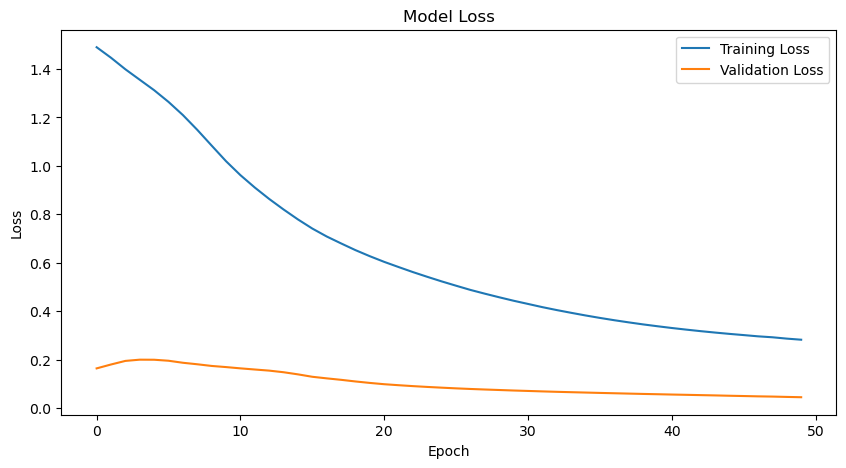

In [525]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [526]:
# Predict on the entire dataset
predictions = autoencoder.predict(scaled_data)
mse = np.mean(np.power(scaled_data - predictions, 2), axis=1)

# Define threshold for anomalies (e.g., 95th percentile of MSE)
threshold = np.percentile(mse, 95)

# Detect anomalies
anomalies = mse > threshold

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


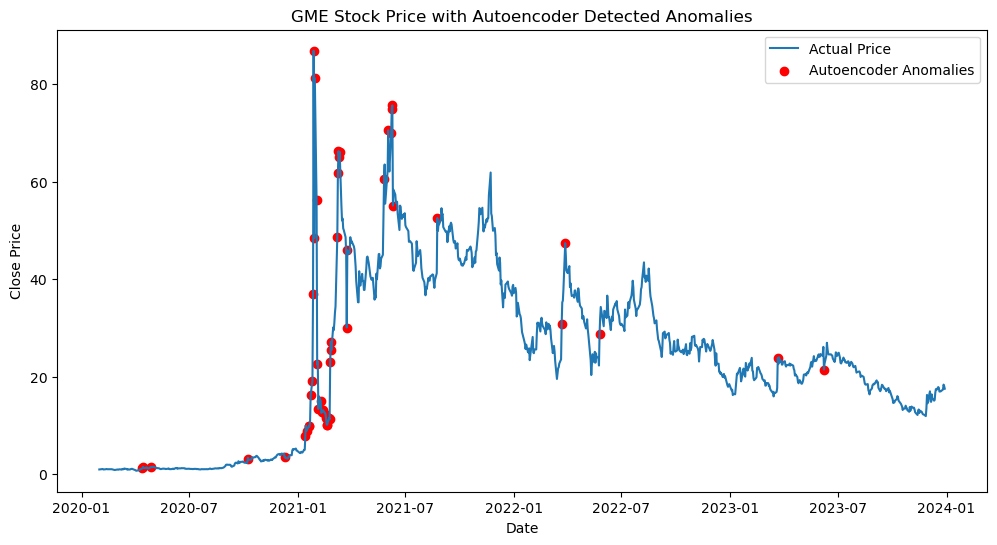

Number of Autoencoder Detected Anomalies: 50


In [527]:
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='Actual Price')
plt.scatter(ticker_data.index[anomalies], 
            ticker_data.loc[anomalies, 'Close'], 
            color='red', label='Autoencoder Anomalies')
plt.title(f'{ticker} Stock Price with Autoencoder Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print summary of Autoencoder anomalies
print(f"Number of Autoencoder Detected Anomalies: {sum(anomalies)}")

In [528]:
# Add Anomaly_Autoencoder column
ticker_data['Anomaly_Autoencoder'] = anomalies.astype(int)

# Update the combined anomaly column
ticker_data['Combined_Anomaly'] = ((abs(ticker_data['Close_Z_Score']) > 3) | 
                                     (ticker_data['Anomaly_IsoForest'] == -1) | 
                                     (ticker_data['Anomaly_DBSCAN'] == -1) |
                                     (ticker_data['Anomaly_Autoencoder'] == 1)).astype(int)

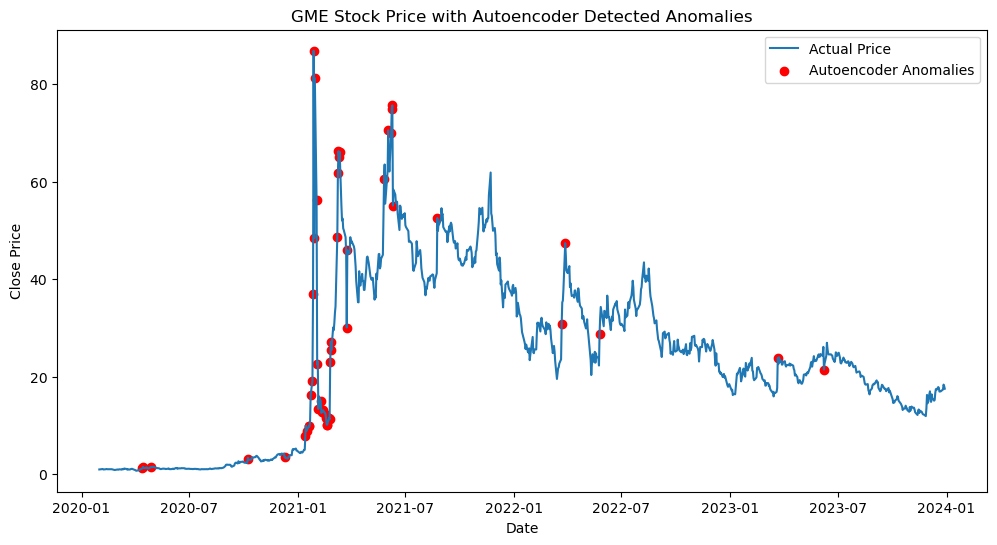

Number of Autoencoder Detected Anomalies: 50

Performance metrics for Autoencoder:
Precision: 1.0000
Recall: 0.4902
F1-Score: 0.6579


In [529]:
plt.figure(figsize=(12, 6))
plt.plot(ticker_data.index, ticker_data['Close'], label='Actual Price')
plt.scatter(ticker_data.index[anomalies], 
            ticker_data.loc[anomalies, 'Close'], 
            color='red', label='Autoencoder Anomalies')
plt.title(f'{ticker} Stock Price with Autoencoder Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print summary of Autoencoder anomalies
print(f"Number of Autoencoder Detected Anomalies: {sum(anomalies)}")

# Calculate performance metrics for Autoencoder
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(ticker_data['Combined_Anomaly'], ticker_data['Anomaly_Autoencoder'])
recall = recall_score(ticker_data['Combined_Anomaly'], ticker_data['Anomaly_Autoencoder'])
f1 = f1_score(ticker_data['Combined_Anomaly'], ticker_data['Anomaly_Autoencoder'])

print("\nPerformance metrics for Autoencoder:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
[[884   0]
 [ 52  50]]


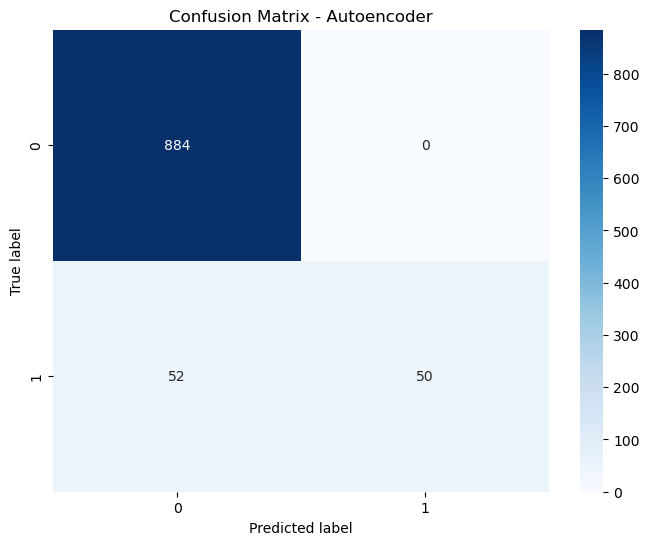

In [530]:
cm = confusion_matrix(ticker_data['Combined_Anomaly'], ticker_data['Anomaly_Autoencoder'])
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Autoencoder')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [531]:
methods = ['Z_Score', 'IsoForest', 'DBSCAN', 'Autoencoder']
results = []

for method in methods:
    if method == 'Z_Score':
        predictions = (abs(ticker_data['Close_Z_Score']) > 3).astype(int)
    elif method == 'IsoForest':
        predictions = (ticker_data['Anomaly_IsoForest'] == -1).astype(int)
    elif method == 'DBSCAN':
        predictions = (ticker_data['Anomaly_DBSCAN'] == -1).astype(int)
    else:  # Autoencoder
        predictions = ticker_data['Anomaly_Autoencoder']
    
    precision = precision_score(ticker_data['Combined_Anomaly'], predictions)
    recall = recall_score(ticker_data['Combined_Anomaly'], predictions)
    f1 = f1_score(ticker_data['Combined_Anomaly'], predictions)

    results.append({
        'Method': method,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(results_df)


Comparison of all methods:
        Method  Precision    Recall  F1-Score
0      Z_Score        1.0  0.039216  0.075472
1    IsoForest        1.0  0.098039  0.178571
2       DBSCAN        1.0  0.990196  0.995074
3  Autoencoder        1.0  0.490196  0.657895


In [532]:
autoencoder_results = {
    'Method': 'Autoencoder',
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
autoencoder_df = pd.DataFrame([autoencoder_results])
results_df = pd.concat([results_df, autoencoder_df], ignore_index=True)


Comparison of all methods:
        Method  Precision    Recall  F1-Score
0      Z_Score        1.0  0.039216  0.075472
1    IsoForest        1.0  0.098039  0.178571
2       DBSCAN        1.0  0.990196  0.995074
3  Autoencoder        1.0  0.490196  0.657895


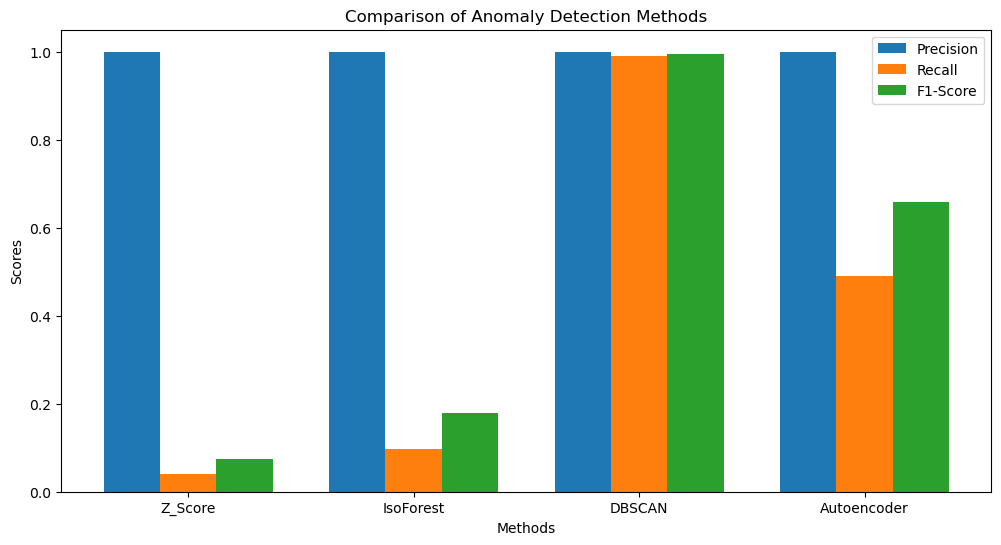

In [533]:
results_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(results_df)

# Visualize the comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(methods))
width = 0.25

plt.bar(x - width, results_df['Precision'], width, label='Precision')
plt.bar(x, results_df['Recall'], width, label='Recall')
plt.bar(x + width, results_df['F1-Score'], width, label='F1-Score')

plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Comparison of Anomaly Detection Methods')
plt.xticks(x, methods)
plt.legend()
plt.show()